In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,196 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and dire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [ ]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/toss/train.parquet')

In [ ]:
df.head()

,gender,age_group,inventory_id,day_of_week,hour,seq,l_feat_1,l_feat_2,l_feat_3,l_feat_4,l_feat_5,l_feat_6,l_feat_7,l_feat_8,l_feat_9,l_feat_10,l_feat_11,l_feat_12,l_feat_13,l_feat_14,l_feat_15,l_feat_16,l_feat_17,l_feat_18,l_feat_19,l_feat_20,l_feat_21,l_feat_22,l_feat_23,l_feat_24,l_feat_25,l_feat_26,l_feat_27,feat_e_1,feat_e_2,feat_e_3,feat_e_4,feat_e_5,feat_e_6,feat_e_7,feat_e_8,feat_e_9,feat_e_10,feat_d_1,feat_d_2,feat_d_3,feat_d_4,feat_d_5,feat_d_6,feat_c_1,feat_c_2,feat_c_3,feat_c_4,feat_c_5,feat_c_6,feat_c_7,feat_c_8,feat_b_1,feat_b_2,feat_b_3,feat_b_4,feat_b_5,feat_b_6,feat_a_1,feat_a_2,feat_a_3,feat_a_4,feat_a_5,feat_a_6,feat_a_7,feat_a_8,feat_a_9,feat_a_10,feat_a_11,feat_a_12,feat_a_13,feat_a_14,feat_a_15,feat_a_16,feat_a_17,feat_a_18,history_a_1,history_a_2,history_a_3,history_a_4,history_a_5,history_a_6,history_a_7,history_b_1,history_b_2,history_b_3,history_b_4,history_b_5,history_b_6,history_b_7,history_b_8,history_b_9,history_b_10,history_b_11,history_b_12,history_b_13,history_b_14,history_b_15,history_b_16,history_b_17,history_b_18,history_b_19,history_b_20,history_b_21,history_b_22,history_b_23,history_b_24,history_b_25,history_b_26,history_b_27,history_b_28,history_b_29,history_b_30,clicked
0,1.0,7.0,36,5,13,"9,18,269,516,57,97,527,74,317,311,269,479,57,7...",1.0,2.0,1.0,23.0,1.0,1.0,193.0,2.0,50.0,118.0,743.0,2877.0,2.0,1591.0,1058.0,2.0,50.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,5.0,2.0,65.000000,-4230.666504,23.863636,-0.05,0.019608,-0.012987,0.6250,-242.488892,-0.612903,-436.228577,0.38961,2.0,1.764706,1.444444,-0.303030,-0.422535,58.840435,0.043634,66.696426,28.672052,45.806812,7.606154,73.891685,26.482759,4.845361,-4.337349,47.611111,0.907216,-75.421051,1961.083374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4727,0.0,0.0,0.0,0.0,0.032765,-0.055556,0.024390,-326.857147,-0.014493,-183.285721,-13.596154,0.115821,0.138626,0.047507,0.050622,0.026479,0.001558,0.024922,0.051401,0.004673,0.021028,0.072428,0.007009,0.028816,0.058410,0.000779,0.072428,0.016355,0.011682,0.010124,0.002336,0.008567,0.070092,0.070092,0.011682,0.004673,0.087226,0.049843,0.015576,0.040498,0.051401,0
1,1.0,7.0,2,5,08,"9,144,269,57,516,97,527,74,315,317,311,269,479...",2.0,2.0,3.0,17.0,193.0,116.0,164.0,2.0,14.0,109.0,674.0,218.0,2.0,122.0,751.0,1.0,14.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,16.0,1.0,65.000000,-1346.648193,4.545455,-0.05,0.019608,-0.012987,104.6875,-194.066666,-52.709679,-390.728577,0.38961,2.0,1.764706,12.865979,-0.303030,-0.422535,58.840435,0.062986,23.371054,28.672052,31.121622,7.223301,73.891685,24.990477,4.432990,-4.469880,14.648149,0.927835,-34.771931,1195.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7767,0.0,0.0,0.0,0.0,0.009340,0.000000,0.000000,-382.285706,0.000000,-176.000000,-11.442307,0.068794,0.072179,0.049471,0.052715,0.027574,0.001622,0.025952,0.053526,0.004866,0.021897,0.075423,0.007299,0.030007,0.060825,0.000811,0.075423,0.017031,0.012165,0.010543,0.002433,0.008921,0.072990,0.072990,0.012165,0.004866,0.045416,0.051904,0.016220,0.042172,0.026763,0
2,1.0,7.0,36,5,11,"269,516,57,97,165,527,74,77,317,269,75,450,15,...",1.0,2.0,1.0,7.0,675.0,85.0,227.0,2.0,362.0,212.0,1029.0,3916.0,1.0,2924.0,2304.0,2.0,362.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1129.0,16.0,1.0,64.638885,-3195.388916,22.727272,-0.05,0.019608,-0.051948,13.6875,-305.844452,-12.677420,-600.885742,0.38961,2.0,1.764706,15.954545,-0.222222,-0.394366,58.840435,0.033670,43.445312,28.672052,41.673958,7.606154,73.891685,27.473171,4.402062,-0.819277,24.388889,0.917526,-67.701752,2386.083252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6597,0.0,0.0,0.0,0.0,0.078562,-0.111111,0.097561,-409.000000,-0.014493,-224.714279,-13.942307,0.112947,0.169634,0.038753,0.041295,0.021600,0.001271,0.020330,0.041930,0.003812,0.017153,0.059083,0.005718,0.023506,0.047647,0.000635,0.059083,0.026683,0.009530,0.008259,0.001906,0.006988,0.057177,0.057177,0.009530,0.003812,0.035577,0.081318,0.012706,0.033036,0.062898,0
3,1.0,8.0,37,5,11,"269,57,516,21,214,269

In [ ]:
# 메모리 사용량 체크 함수
def memory_usage(df):
    return f"메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB"

print("라이브러리 로드 완료")
print(f"원본 {memory_usage(df)}")

라이브러리 로드 완료
원본 메모리 사용량: 27897.43 MB


In [ ]:
# 2. 결측값 확인
# 각 열에 몇 개의 결측값이 있는지 합계를 내어 출력합니다.
print("--- 각 열의 결측값 개수 ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # 결측값이 있는 열만 출력

print("\n----------------------------------\n")


# 3. 결측행 삭제
print(f"결측행 삭제 전 데이터 형태: {df.shape}")

# dropna() 함수를 사용하여 결측값이 포함된 모든 행을 삭제합니다.
df_cleaned = df.dropna()

print(f"결측행 삭제 후 데이터 형태: {df_cleaned.shape}")


# 4. 삭제 결과 확인
# 삭제 후에는 결측값이 남아있지 않은 것을 확인할 수 있습니다.
print("\n--- 삭제 후 결측값 재확인 ---")
print(f"남아있는 결측값 개수: {df_cleaned.isnull().sum().sum()}")

--- 각 열의 결측값 개수 ---
gender            17208
age_group         17208
l_feat_2          17208
l_feat_8          17208
l_feat_18         17208
l_feat_19         17208
l_feat_20         17208
l_feat_21         17208
l_feat_22         17208
l_feat_23         17208
l_feat_24         17208
feat_e_1          17208
feat_e_2          17208
feat_e_3        1085557
feat_e_4          17208
feat_e_5          17208
feat_e_6          17208
feat_e_7          17208
feat_e_8          17208
feat_e_9          17208
feat_e_10         17208
feat_d_1          17208
feat_d_2          17208
feat_d_3          17208
feat_d_4          17208
feat_d_5          17208
feat_d_6          17208
feat_c_1          17208
feat_c_2          17208
feat_c_3          17208
feat_c_4          17208
feat_c_5          17208
feat_c_6          17208
feat_c_7          17208
feat_c_8          17208
feat_b_1          17208
feat_b_2          17208
feat_b_3          17208
feat_b_4          17208
feat_b_5          17208
feat_b_6          17

In [ ]:
# 고유값이 1개인 컬럼 찾기 (결측값 제외)
single_value_cols = df_cleaned.nunique() <= 1

# 해당 컬럼들 제거
df_processed = df_cleaned.loc[:, ~single_value_cols]

In [ ]:
df_processed.shape

(9611653, 117)

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

continuous_features = []

# 데이터프레임의 모든 컬럼을 순회하면서
# 컬럼 이름이 'history_'로 시작하는 경우 리스트에 추가합니다.
for col in df.columns:
    if col.startswith('history_'):
        continuous_features.append(col)

print("연속형 피쳐 목록 (continuous_features):")
print(continuous_features)
print(f"\n총 {len(continuous_features)}개의 연속형 피쳐가 식별되었습니다.")

# RobustScaler 객체 생성
scaler = RobustScaler()

# 데이터에 스케일러를 학습시키고 변환 적용
df_processed[continuous_features] = scaler.fit_transform(df_processed[continuous_features])

연속형 피쳐 목록 (continuous_features):
['history_a_1', 'history_a_2', 'history_a_3', 'history_a_4', 'history_a_5', 'history_a_6', 'history_a_7', 'history_b_1', 'history_b_2', 'history_b_3', 'history_b_4', 'history_b_5', 'history_b_6', 'history_b_7', 'history_b_8', 'history_b_9', 'history_b_10', 'history_b_11', 'history_b_12', 'history_b_13', 'history_b_14', 'history_b_15', 'history_b_16', 'history_b_17', 'history_b_18', 'history_b_19', 'history_b_20', 'history_b_21', 'history_b_22', 'history_b_23', 'history_b_24', 'history_b_25', 'history_b_26', 'history_b_27', 'history_b_28', 'history_b_29', 'history_b_30']

총 37개의 연속형 피쳐가 식별되었습니다.


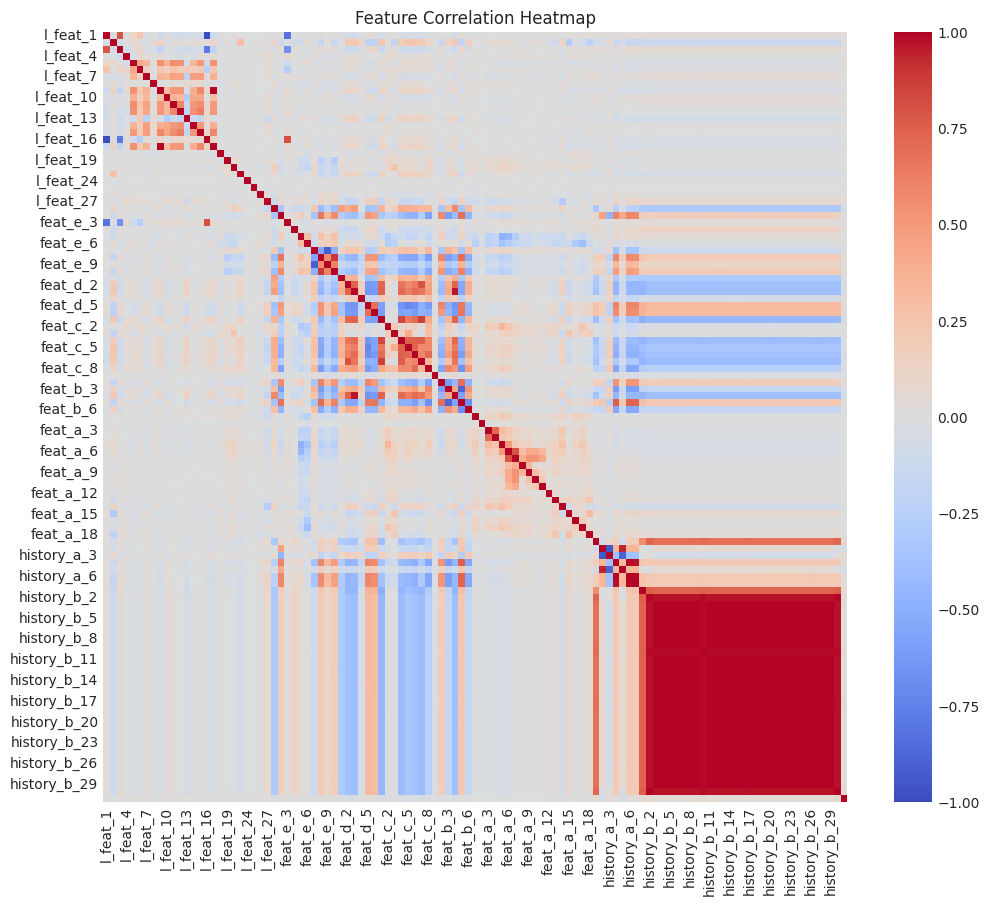

In [ ]:
numeric_features = df_processed.select_dtypes(include=np.number).columns
corr = df_processed[numeric_features].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df_numeric = df_processed[numeric_features].drop(columns=['clicked']) # 예시, 타겟 변수 제외
df_numeric = df_numeric.dropna() # VIF는 결측값이 있으면 계산되지 않습니다.

# VIF 계산을 위해 상수항(intercept)을 추가합니다.
X = sm.add_constant(df_numeric)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF가 높은 순으로 정렬하여 출력
print(vif_data.sort_values(by='VIF', ascending=False))

NameError: name 'df_processed' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- 예시 데이터 생성 (실제 데이터로 대체) ---
# 실제로는 이전에 전처리 및 스케일링이 완료된 데이터프레임을 사용해야 합니다.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5,
                           n_redundant=0, weights=[0.9, 0.1], random_state=42)
df_processed = pd.DataFrame(X, columns=[f'feat_{i}' for i in range(20)])
df_processed['clicked'] = y

# 사전 준비: 스케일링
scaler = StandardScaler()
numeric_cols = df_processed.columns.drop('clicked')
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed[numeric_cols]), columns=numeric_cols)
df_scaled['clicked'] = df_processed['clicked']
# --- 예시 데이터 생성 끝 ---


# 1. 데이터를 클릭(1)과 비클릭(0)으로 분리
df_clicked = df_scaled[df_scaled['clicked'] == 1].copy()
df_non_clicked = df_scaled[df_scaled['clicked'] == 0].copy()

# 샘플링 전 데이터 분포 확인
print("--- 샘플링 전 데이터 분포 ---")
print(df_scaled['clicked'].value_counts())
print("\n----------------------------------\n")

# 사용할 피처만 선택 (타겟 변수인 'clicked' 제외)
features = df_scaled.columns.drop('clicked')
X_clicked = df_clicked[features]
X_non_clicked = df_non_clicked[features]


# 2. 클릭(1) 데이터의 중심점(Centroid) 계산
# 각 피처의 평균값을 계산하여 중심점을 구합니다.
centroid_clicked = X_clicked.mean(axis=0).values


# 3. 모든 비클릭(0) 데이터와 중심점 간의 거리 계산
# 유클리드 거리를 계산합니다.
distances = np.linalg.norm(X_non_clicked.values - centroid_clicked, axis=1)
df_non_clicked['distance_to_centroid'] = distances


# 4. 남길 비클릭(0) 데이터 개수 설정
# 클릭 데이터의 N배수로 설정하는 것이 일반적입니다.
# 예: 비클릭 데이터를 클릭 데이터의 3배수만큼 남기기 (비율 3:1)
n_clicked_samples = len(df_clicked)
ratio = 3.0
n_samples_to_keep = int(n_clicked_samples * ratio)


# 5. 거리가 가까운 순서대로 비클릭(0) 데이터 샘플링
df_non_clicked_sampled = df_non_clicked.sort_values(by='distance_to_centroid', ascending=True).head(n_samples_to_keep)


# 6. 최종 데이터셋 생성
# 원래의 클릭(1) 데이터와 샘플링된 비클릭(0) 데이터를 합칩니다.
# 거리 계산에 사용된 'distance_to_centroid' 열은 삭제합니다.
final_df = pd.concat([df_clicked, df_non_clicked_sampled.drop(columns=['distance_to_centroid'])])


# 샘플링 후 데이터 분포 확인
print("--- 샘플링 후 데이터 분포 ---")
print(final_df['clicked'].value_counts())
print(f"\n최종 데이터셋 크기: {final_df.shape}")